# Required libraries/packages

In [1]:
!pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
!pip install tqdm
from tqdm import tqdm

# Support functions

In [2]:
# Display a digit from the MNIST dataset
def display_digit(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('Class = ' + str(data_sample[1]))

# Display the weights of the model
def display_parameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

# MNIST Dataset

In [3]:
# Training set
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Validation set
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

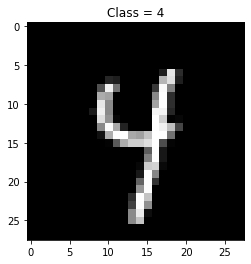

In [4]:
display_digit(train_dataset[26])

# Model creation

In [5]:
# Define softmax classifier class
class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

# Set input size and output size
input_dim = 28 * 28
output_dim = 10

# Create the model
model = SoftMax(input_dim, output_dim)

Display the initial weights (parameters) of the model:

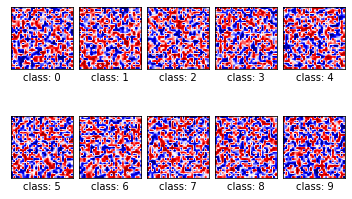

In [6]:
display_parameters(model)

# Training

In [7]:
# Define the learning rate, optimizer, criterion and data loader
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# Train the model
n_epochs = 50
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)
def train_model(n_epochs):
    for epoch in tqdm(range(n_epochs)):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

100%|██████████| 50/50 [07:13<00:00,  8.66s/it]


Display the trained weights (parameters) of the model:

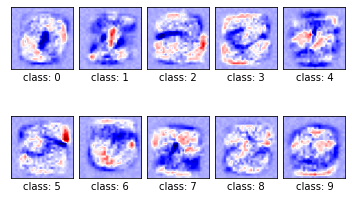

In [8]:
display_parameters(model)

# Results

Plot the loss and accuracy:

Final accuracy: 93.03%


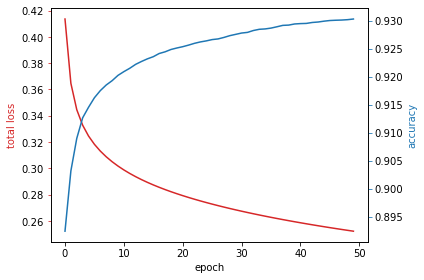

In [9]:
# Loss
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch')
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

# Accuracy
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()
print("Final accuracy: " + str(100*round(accuracy_list[-1], 4)) + "%")

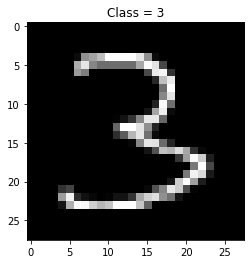

Prediction: 3  ==>  Prediction correct!
Probability of class  0.9951233267784119


In [10]:
# Random inference on the validation dataset
Softmax_fn = nn.Softmax(dim=-1)
index = np.random.randint(0, len(validation_dataset))
sample = validation_dataset[index]
x = sample[0]
y = sample[1]
z = model(x.reshape(-1, 28 * 28))
_, yhat = torch.max(z, 1)
display_digit(sample)
plt.show()
text = "Prediction incorrect!"
if yhat == y:
  text = "Prediction correct!"
print("Prediction:", yhat.item(), " ==> ", text)
print("Probability of class ", torch.max(Softmax_fn(z)).item())